In [146]:
from PIL import Image, ImageOps, ImageDraw, ImageFont
from bidi.algorithm import get_display
import arabic_reshaper
import numpy as np
import matplotlib.pyplot as plt

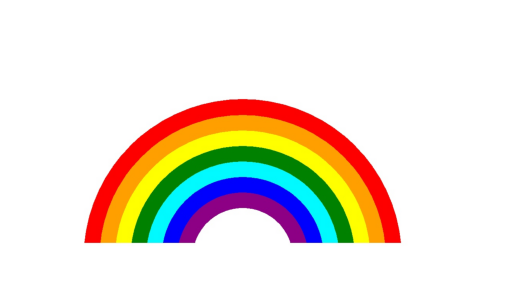

In [147]:
#Read a color image with PIL

img = Image.open("Input\Rainbow.jpg")
plt.axis('off')
plt.imshow(img)
plt.show()
draw = ImageDraw.Draw(img)

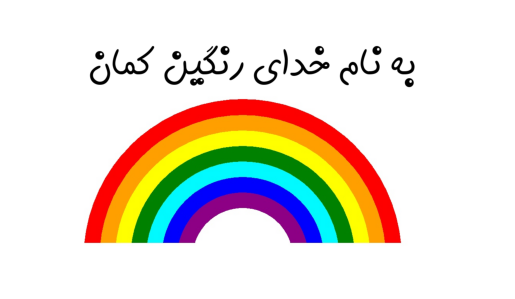

In [148]:
#Adding a Persian Text to image

font = ImageFont.truetype("Input\B_Morvarid.ttf", 100)
text = "به نام خدای رنگین کمان"
reshaped_text = arabic_reshaper.reshape(text)
bidi_text = get_display(reshaped_text)

draw.text((200, 100), bidi_text, (0, 0, 0), font=font)

plt.imshow(img)
plt.axis(False)
plt.show()

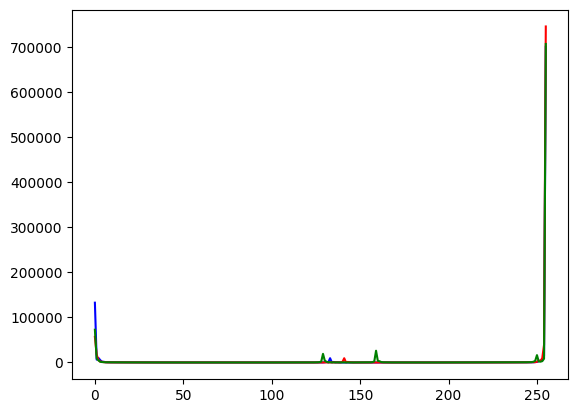

In [156]:
# Calculate 3 histograms and show with plt

colors = [ "red" , "green" , "blue"]
b = np.zeros(256)
g = np.zeros(256)
r = np.zeros(256)

pixels = img.load()
width, height = img.size
                     
for x in range(height):        
    for y in range(width): 
            value = pixels[y,x]      
            r[value[0]] = r[value[0]]+1
            g[value[1]] = g[value[1]]+1
            b[value[2]] = b[value[2]]+1

plt.plot(b , color= colors[2])
plt.plot(r , color= colors[0])
plt.plot(g , color= colors[1])


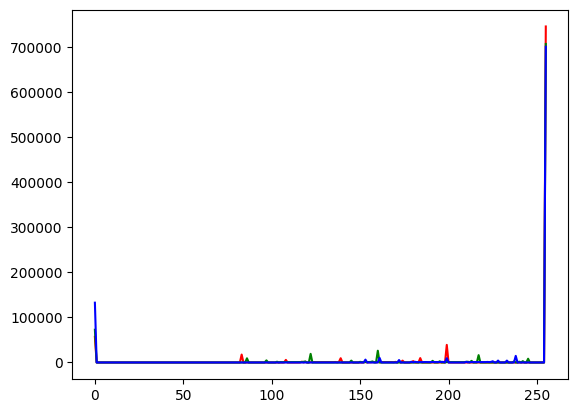

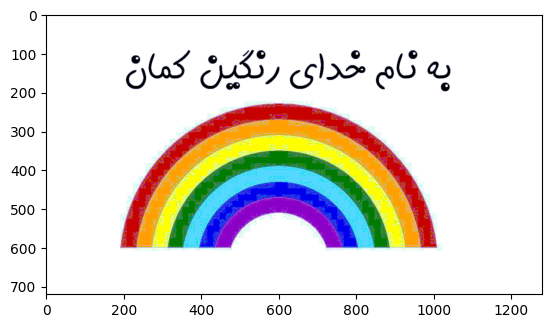

In [150]:
# Equalizes the image histogram

equalized_img = ImageOps.equalize(img, mask=None)
r, g, b = equalized_img.split()
plt.plot(r.histogram(), color='red')
plt.plot(g.histogram(), color='green')
plt.plot(b.histogram(), color='blue')
plt.show()
plt.imshow(equalized_img, cmap='gray')
plt.show()

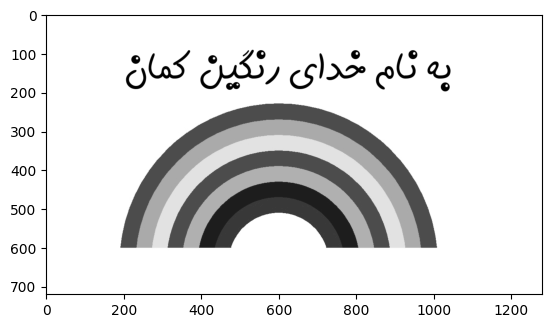

In [151]:
# Convert image to gray

gray_img = img.convert("L")
plt.imshow(gray_img, cmap='gray')

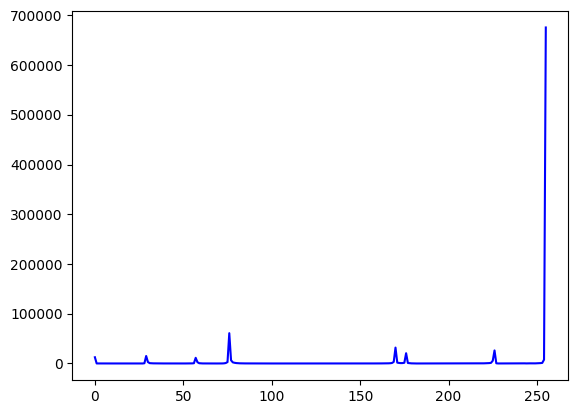

In [152]:
#Calculate histogram and show with plt

gray_scale = np.zeros(256)
gray = gray_img.load()
width, height = img.size
                    
for x in range(height):        
    for y in range(width): 
            value = gray[y,x]      
            gray_scale[value] = gray_scale[value]+1


plt.plot(gray_scale , color= "blue")

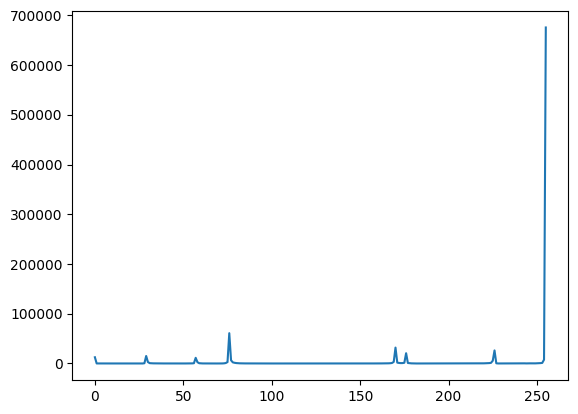

In [153]:
# Equalizes the gray image histogram

plt.plot(gray_img.histogram())
plt.show()